![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the BSc-level course **Mechanical Properties of Loose Rocks and Soils**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# Beschreibung von Kornverteilungskurven

In [13]:
#HIDDEN
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interactive
import scipy as sp
from scipy import interpolate
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/kornverteilungskurve_plots.ipynb

Im Zuge der Bestimmung einer Sieblinie werden Siebrückstände $m_i$ ermittelt. Die einzelnen zu den Siebdurchmessern $d_i$ gehörigen Siebrückstände $m_i$ können nun auf die Gesamtmasse $m_\text{d} = \sum m_i$ (Annahme vernachlässigbarer Siebverluste) bezogen werden, womit die Masseanteile

$$
    x_i = \frac{m_i}{m_\text{d}}
$$

ermittelt werden. Diese werden typischerweise in einer Summenkurve

$$
    F(d_i) = \sum \limits_{k=1}^i x_i
$$

aufgetragen. Dabei wird aufgrund der über Größenordnungen verteilten Korndurchmesser eine halblogarithmische Darstellung gewählt (siehe folgende Abbildung, rechts). Feinanteile, die nicht durch Siebung näher untersucht werden, sind nicht mit dargestellt. In der linken Abbildung sind die Masseanteile selbst und das zugehörige Histogramm der Masseverteilung dargestellt.

Mithilfe der Körnungslinie bzw. Kornverteilungskurve können die dominierenden Bestandteile (T, U, S, G) ermittelt werden. Des weiteren können die Ungleichförmigkeitszahl

$$
    C_U = \frac{d_{60}}{d_{10}}
$$

und die Krümmungszahl

$$
    C_C = \frac{d_{30}^2}{d_{10}\ d_{60}}
$$

abgeleitet werden. 

Die folgenden Siebrückstände seien gegeben:

In [14]:
#HIDDEN
Siebdurchmesser = np.array([63,31.5,16,8,4,2,1,0.5,0.25,0.125,0.063,0.001])#letzter: Rückstand in Null
Startwerte = np.array([0,0,842.4,1059.8,1222.9,788.0,706.6,407.6,210.0,195.7,0,0])

Massen = [widgets.FloatText(value=Startwerte[i],description=str(Siebdurchmesser[i])+' mm') for i in range(len(Siebdurchmesser))]
Eingabe=widgets.VBox(Massen)
Eingabe

In [15]:
#HIDDEN
def plot(Neuauswertung):
    m_i = Siebmassen(Eingabe)
    dm_i = Masseanteile(m_i)
    sum_dm_i = Siebdurchgang(dm_i)
    plot_KVK(sum_dm_i)

interact(plot, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

Damit lassen sich die Masseanteile der einzelnen Kornfraktionen ablesen (in Prozent):

In [16]:
#HIDDEN
def Anteilsbestimmung(Neuauswertung):
    a=Anteile(Siebdurchmesser,Siebdurchgang(Masseanteile(Siebmassen(Eingabe))))
    display(a)
    
interact(Anteilsbestimmung, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

In [17]:
#HIDDEN
def plot2(Neuauswertung):
    m_i = Siebmassen(Eingabe)
    dm_i = Masseanteile(m_i)
    sum_dm_i = Siebdurchgang(dm_i)
    plot_Rohdaten(dm_i,sum_dm_i)

interact(plot2, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

### Ergänzende Überlegungen (nicht interaktiv)

Betrachten wir nun eine Mischung zweier gleichförmiger Böden mit unterschiedlichen mittleren Korndurchmessern.

In [18]:
#HIDDEN
m_1 = np.array([0,0,0,0,0,0,0,0,20,60,20,0])
dm_1 = Masseanteile(m_1)
sum_dm_1 = Siebdurchgang(dm_1)

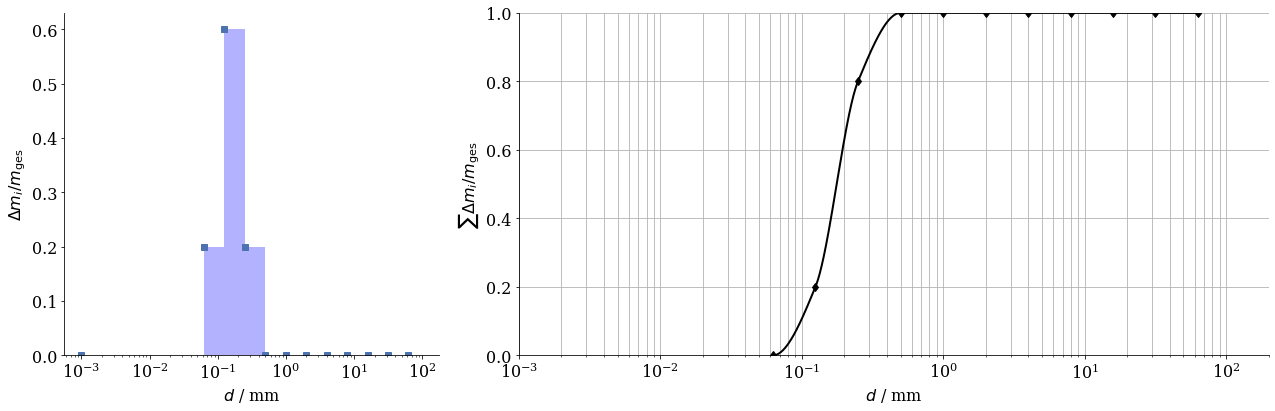

In [19]:
#HIDDEN
plot_Rohdaten(dm_1,sum_dm_1)

In [20]:
#HIDDEN
m_2 = np.array([0,0,0,60,180,60,1,1,0,0,0,0])
dm_2 = Masseanteile(m_2)
sum_dm_2 = Siebdurchgang(dm_2)

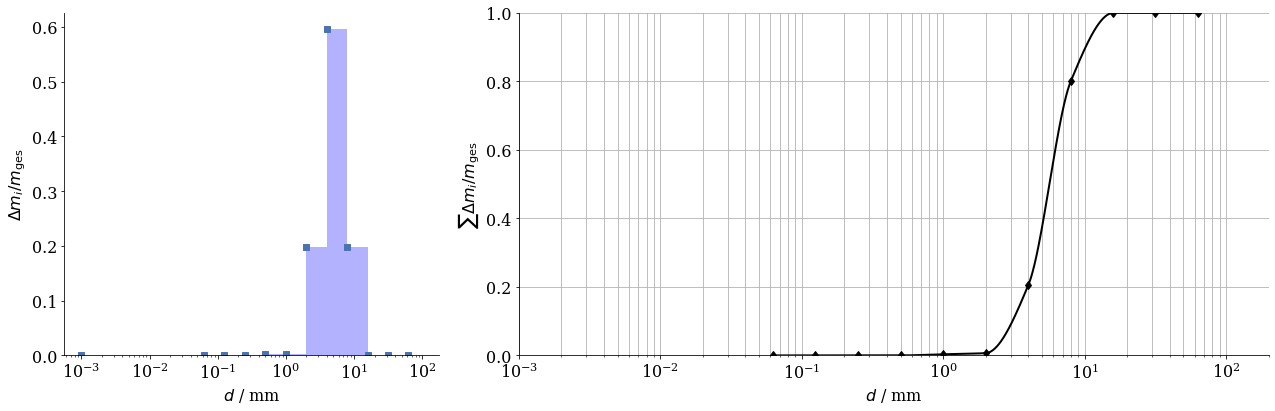

In [21]:
#HIDDEN
plot_Rohdaten(dm_2,sum_dm_2)

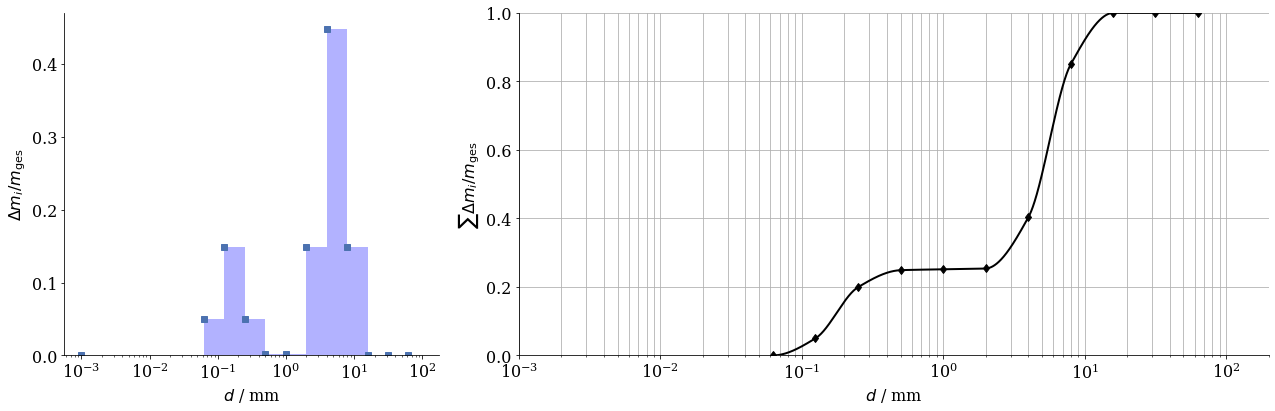

In [22]:
#HIDDEN
m_12 = m_1 + m_2
dm_12 = Masseanteile(m_12)
sum_dm_12 = Siebdurchgang(dm_12)
plot_Rohdaten(dm_12,sum_dm_12)

Es ergibt sich eine erwartungsgemäß eine bimodale Verteilung.

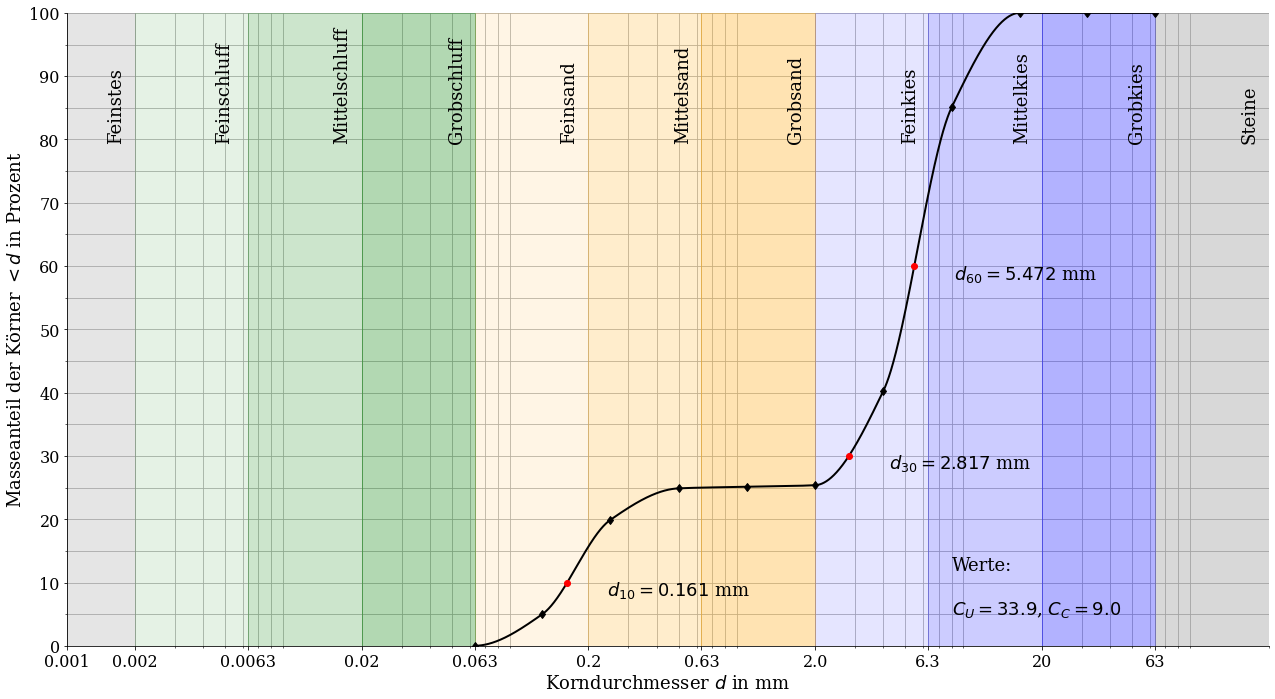

In [23]:
#HIDDEN
plot_KVK(sum_dm_12)

## Anmerkung zur Achsenteilung der KVK

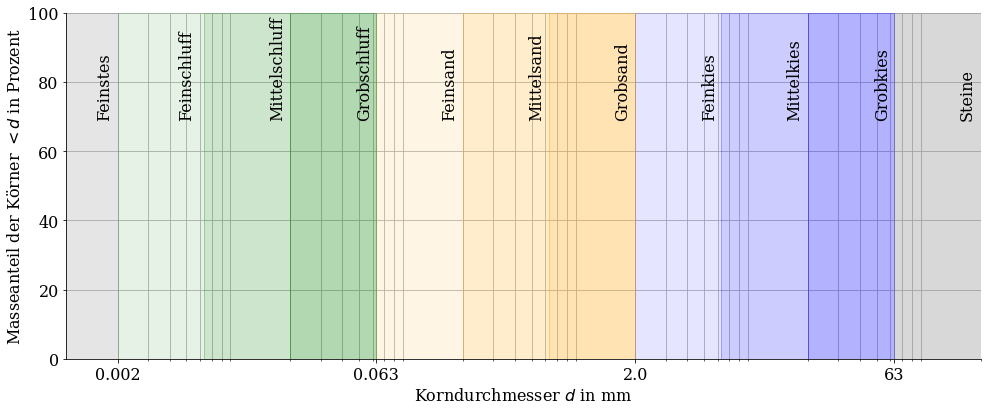

In [24]:
#HIDDEN
plot_basics()

Seien die Grenzen Schluff-/Tonkorn Kies/Sand mit 2 µm bzw. 2 mm gegeben. Möchte man nun im logarithmischen Maßstab in der Mitte zwischen 2 und 0.002 einen Wert $x$ setzen, so gilt:

$$
    \log \frac{2}{0.002} = 2 \log \frac{x}{0.002}
$$

und mit den bekannten Rechenregeln:

\begin{align}
    \frac{2}{0.002} &= \left( \frac{x}{0.002} \right)^2
    \\ \\
    x &= 0.002 \sqrt{1000}
    \\
    &\approx 0.063
\end{align}

Die Grenze liegt also bei 0.063 mm. Dieses Muster setzt sich bei der Einteilung in die weiteren Untergruppen fort.